In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'
pd.options.display.float_format = '{:.5f}'.format

In [2]:
data = pd.read_csv('C:/Users/whileduck/Dropbox/python/car.csv')

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


### 안쓸 데이터 지우기

In [5]:
df = df.iloc[:,3:]
df

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.38091,238961.25050,35321.45877
1,0,41,66646.89292,9572.95714,530973.90780,45115.52566
2,1,43,53798.55112,11160.35506,638467.17730,42925.70921
3,1,58,79370.03798,14426.16485,548599.05240,67422.36313
4,1,57,59729.15130,5358.71218,560304.06710,55915.46248
...,...,...,...,...,...,...
495,0,41,71942.40291,6995.90252,541670.10160,48901.44342
496,1,38,56039.49793,12301.45679,360419.09880,31491.41457
497,1,54,68888.77805,10611.60686,764531.32030,64147.28888
498,1,59,49811.99062,14013.03451,337826.63820,45442.15353


array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Salary'}>,
        <AxesSubplot:title={'center':'Credit Card Debt'}>],
       [<AxesSubplot:title={'center':'Net Worth'}>,
        <AxesSubplot:title={'center':'Car Purchase Amount'}>]],
      dtype=object)

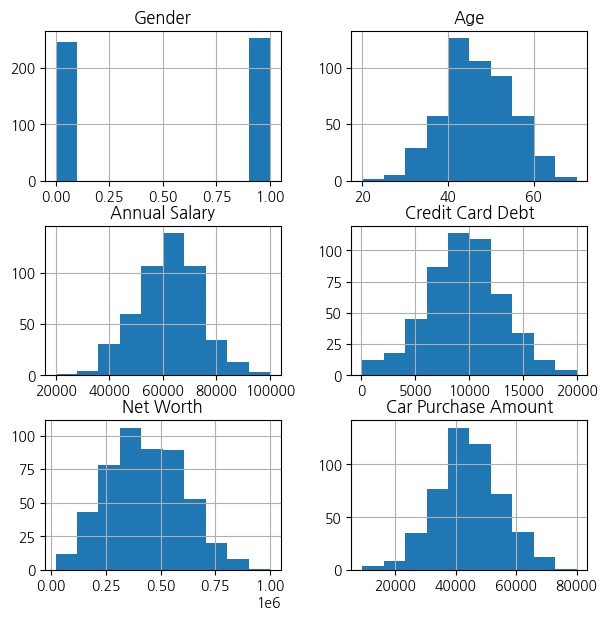

In [6]:
df.hist(figsize = [7,7]) 
# 데이터들도 전부 정규 분포 형태를 보이고 따로 전처리 할 거가 없어보임 

In [7]:
# train_test_split 모듈을 사용해도 되지만 귀찮으니까 그냥 나누자 

In [8]:
test_index = np.random.randint(500,size = 160) # random한 난수를 500 안에서 생성하자 
                                  # 8:2의 사이즈로 생성 할 거니까 160개의 난수 생성
print(test_index[:10])

[ 45  89 266 308 283  99 262 221 456  55]


In [9]:
test_set = df.iloc[test_index].drop_duplicates()  #test set 가져가고
test_feature = test_set.iloc[:,:-1] #test_set 의 독립변수
test_target = test_set.iloc[:,-1] #test_set 의 종속변수 

display('test_set 의 독립 변수 목록',test_feature.iloc[:5])
print('----'*20)
display('test_set 의 종소 변수 목록 ',test_target.iloc[:5])

'test_set 의 독립 변수 목록'

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
45,0,55,70787.27764,10155.34095,853913.85320
89,1,32,20000.00000,14261.80773,579181.65520
266,1,40,53921.33351,9046.18109,515305.48410
308,0,37,78804.99824,12710.00309,315058.71670
283,1,41,59060.08664,5841.61204,136346.30690


--------------------------------------------------------------------------------


'test_set 의 종소 변수 목록 '

45    68925.09447
89    12895.71468
266   37076.82508
308   42497.72862
283   29417.64694
Name: Car Purchase Amount, dtype: float64

In [10]:
train_set = df.drop(index = test_index, axis = 0)
print('train_set의 크기',train_set.shape)
print('test_set의 크기',test_set.shape)

train_set의 크기 (368, 6)
test_set의 크기 (132, 6)


# EDA

In [11]:
df = train_set
df

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
1,0,41,66646.89292,9572.95714,530973.90780,45115.52566
2,1,43,53798.55112,11160.35506,638467.17730,42925.70921
3,1,58,79370.03798,14426.16485,548599.05240,67422.36313
4,1,57,59729.15130,5358.71218,560304.06710,55915.46248
5,1,57,68499.85162,14179.47244,428485.36040,56611.99784
...,...,...,...,...,...,...
493,0,43,77665.17195,13308.87932,349588.56080,47760.66427
495,0,41,71942.40291,6995.90252,541670.10160,48901.44342
496,1,38,56039.49793,12301.45679,360419.09880,31491.41457
497,1,54,68888.77805,10611.60686,764531.32030,64147.28888


In [12]:
# 독립 변수 간 상관 관계가 있는 목록이 뭐가 있을지 한 번 보자 

<AxesSubplot:>

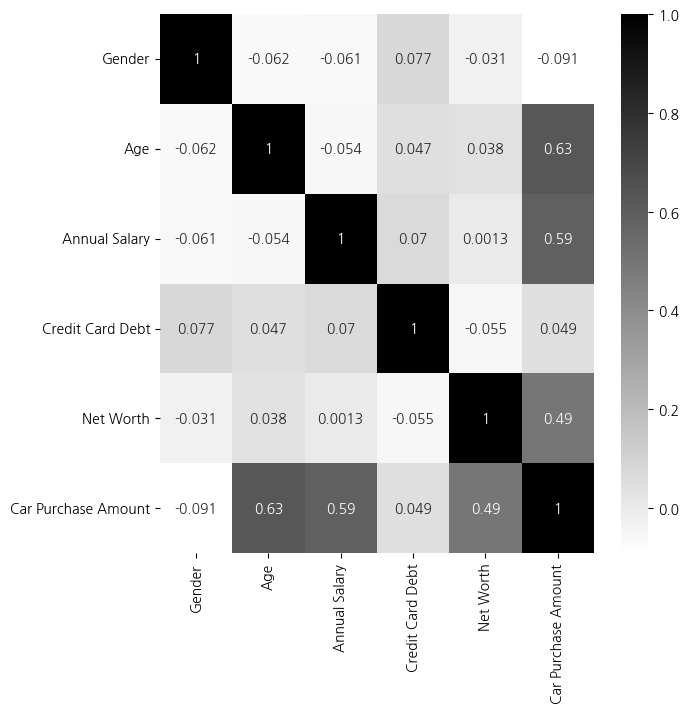

In [13]:
plt.figure(figsize = [7,7])
sns.heatmap(df.corr(),annot = True , cmap = 'binary')
# 독립변수간 상관관계도 없고 다들 종속 변수와 상관관계를 보임 

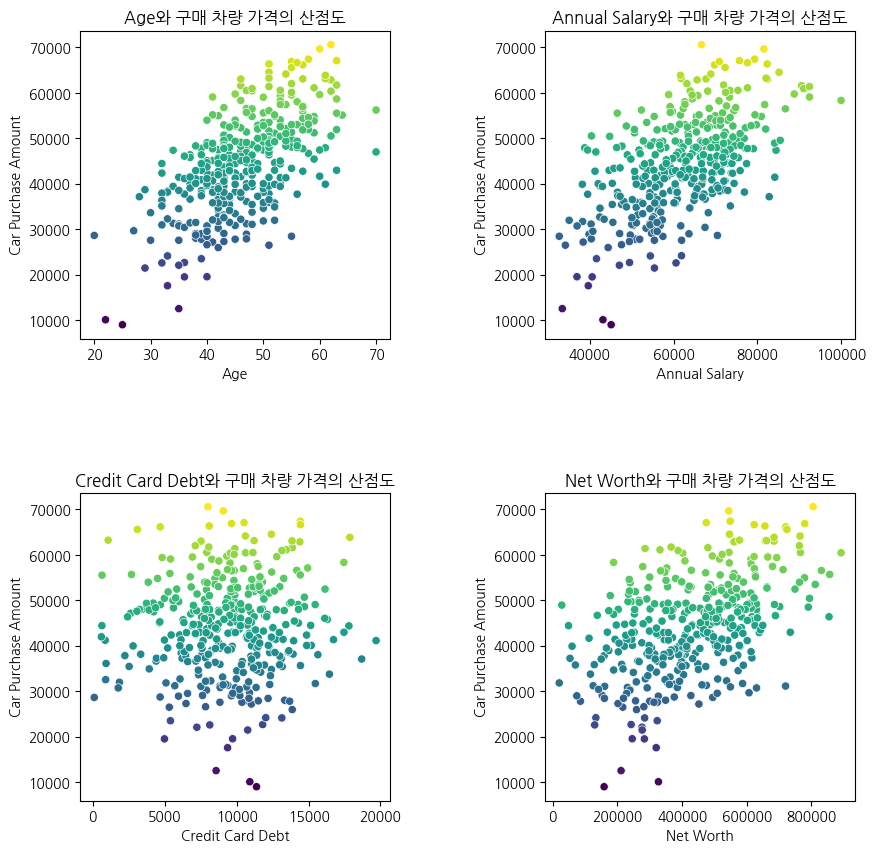

In [14]:
columns = df.columns.tolist()[1:-1]
plt.figure(figsize = [10,10])

plt.subplots_adjust(wspace = 0.5,hspace = 0.5)


for i,var in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data = df,
                x = df[columns[i]],
                y = df.iloc[:,-1],
                c = df.iloc[:,-1])
    plt.title(f'{var}와 구매 차량 가격의 산점도')

### 범주형 변수인 성별에 따른 차이가 있을까?

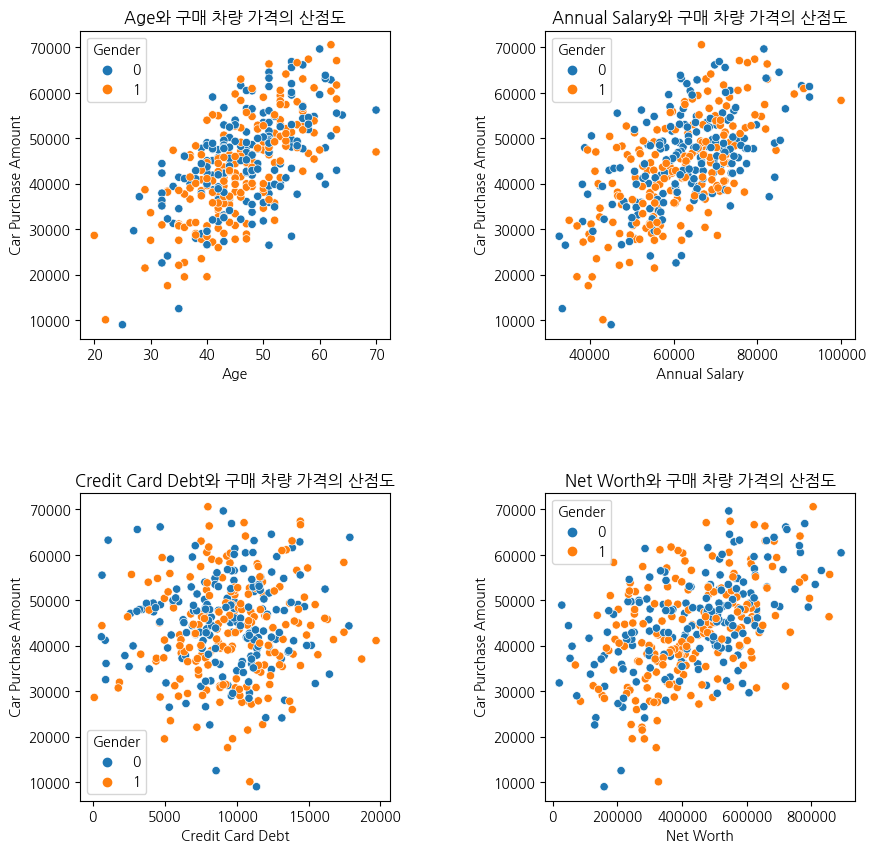

In [15]:
columns = df.columns.tolist()[1:-1]
plt.figure(figsize = [10,10])

plt.subplots_adjust(wspace = 0.5,hspace = 0.5)


for i,var in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data = df,
                x = df[columns[i]],
                y = df.iloc[:,-1],
                hue = 'Gender')
    plt.title(f'{var}와 구매 차량 가격의 산점도') #성별에 따른 큰 차이는 없네

# 데이터의 전체적인 분포 확인 

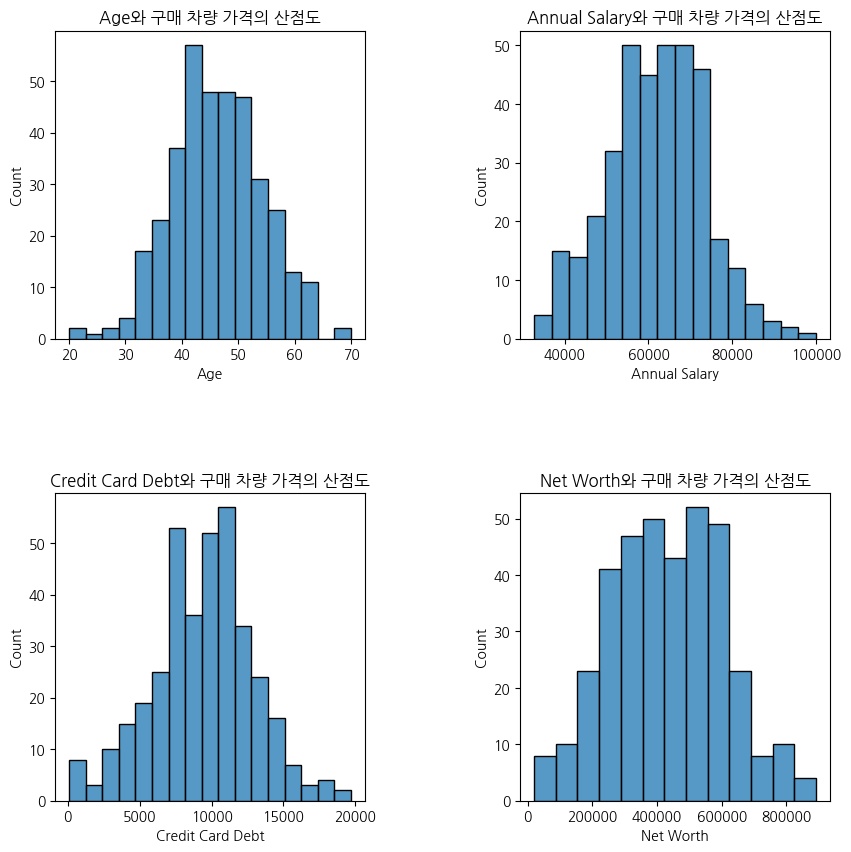

In [16]:
columns = df.columns.tolist()[1:-1]
plt.figure(figsize = [10,10])

plt.subplots_adjust(wspace = 0.5,hspace = 0.5)


for i,var in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df,
                x = df[columns[i]])
    plt.title(f'{var}와 구매 차량 가격의 산점도')

Text(0.5, 1.0, '성별에 따른 차량 구매 가액')

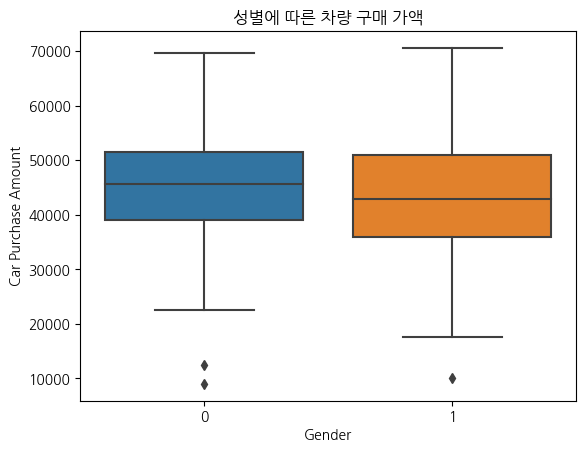

In [17]:
sns.boxplot(x='Gender', y='Car Purchase Amount', data=df)
plt.title('성별에 따른 차량 구매 가액')

# 경사하강법으로 회귀 계수 구하기 

In [20]:
X = np.c_[np.ones((368,1)),np.array(df.iloc[:,:-1])]
Y = np.array(df.iloc[:,-1]).reshape(-1,1)

In [ ]:
display(X[:5]),display(Y[:5])

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:25<00:00, 195.22it/s]


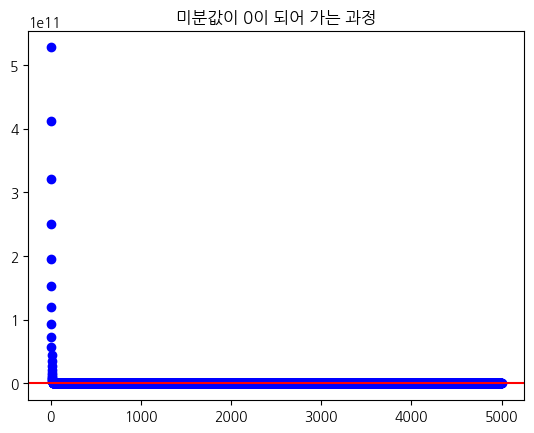

In [287]:
eta = 0.0000000000005
coin = 5000
m = 368

theta = np.random.randn(6,1)
gradient = np.random.randn(6,1)



for _ in trange(coin):
    _ += 1
    gradient = 2/m * X.T.dot(X.dot(theta) - Y) 
    theta = theta - eta * gradient
    plt.scatter(_,gradient[5], c = 'b')
    

plt.title('미분값이 0이 되어 가는 과정')
plt.axhline(y = 0, c = 'r')
plt.show()


In [288]:
Y_hat = theta[0]*X[:,0] + theta[1]*X[:,1] + theta[2] * X[:,2] + theta[3] * X[:,3] + theta[4] * X[:,4] + theta[5] * X[:,5] 

Text(0.5, 1.0, '실제값 = 빨간색 , 예측값 = 파란색')

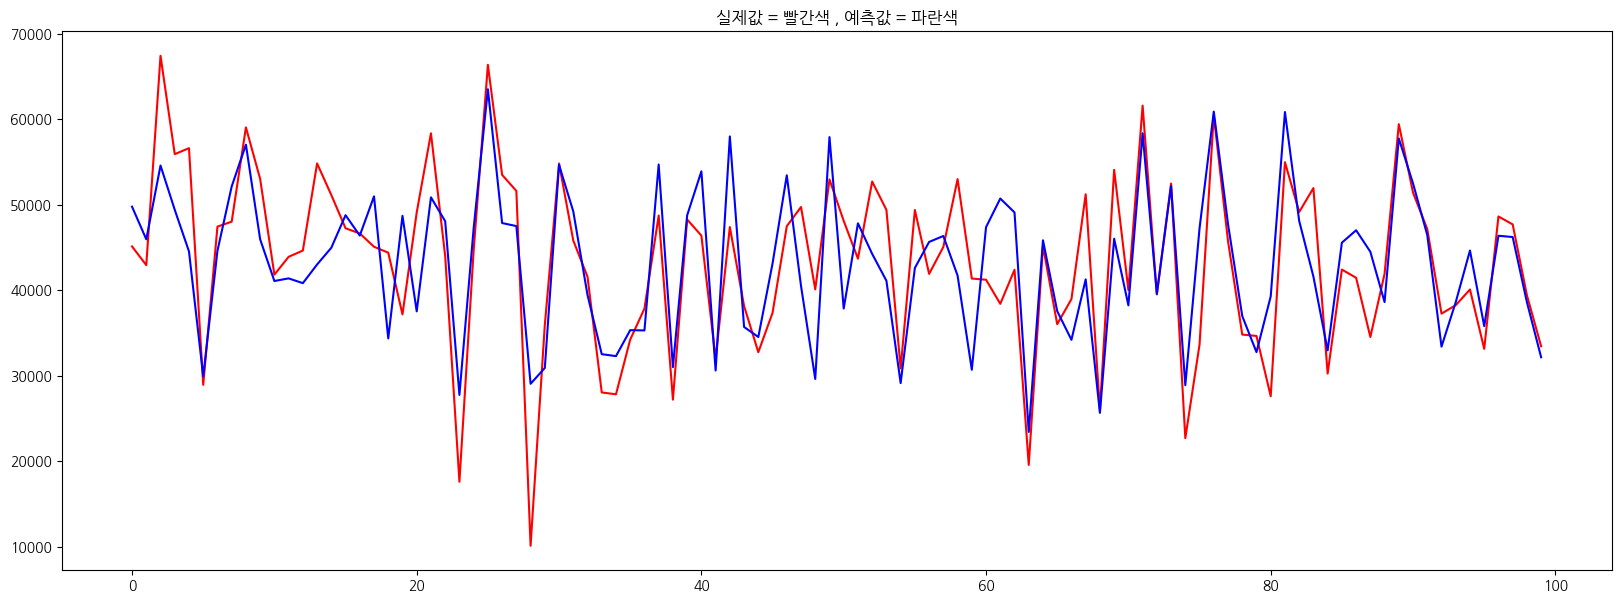

In [322]:
plt.figure(figsize = [20,7])
plt.plot(Y[:100], c = 'r')
plt.plot(Y_hat [:100], c = 'b')
plt.title('실제값 = 빨간색 , 예측값 = 파란색')

# test set 에 적용

In [339]:
X = np.c_[np.ones((132,1)),np.array(test_feature)]
predicted_value = theta[0]*X[:,0] + theta[1]*X[:,1] + theta[2] * X[:,2] + theta[3] * X[:,3] + theta[4] * X[:,4] + theta[5] * X[:,5] 
Y = np.array(test_target)

Text(0.5, 1.0, '예측값 : 파란색, 실제값 : 빨간색')

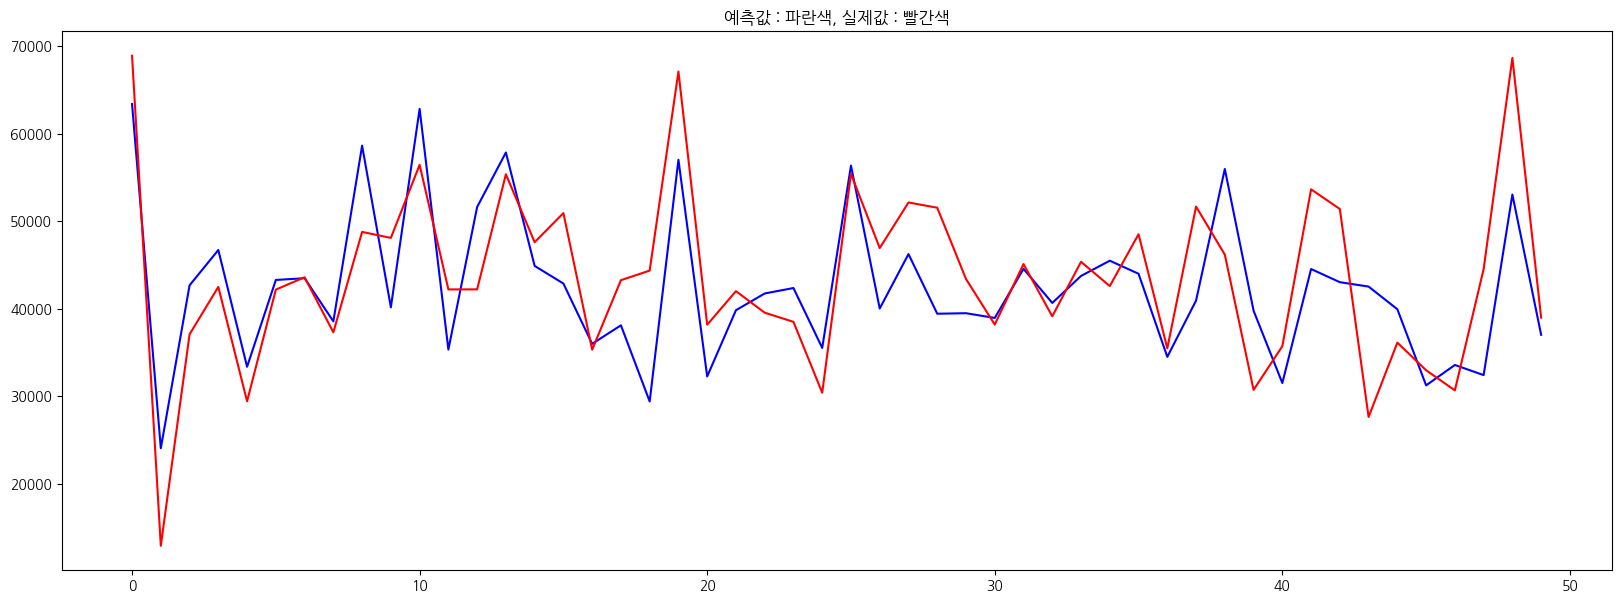

In [340]:
plt.figure(figsize = [20,7])
plt.plot(predicted_value[:50], c = 'b')
plt.plot(Y[:50],c = 'r')
plt.title('예측값 : 파란색, 실제값 : 빨간색')

In [346]:
SSE = ((Y - predicted_value)**2).sum()
SST = ((Y - Y.mean())**2).sum()
R_squared = 1 - SSE/SST
R_squared

0.620389386333481

In [348]:
residual = Y - predicted_value

standard_residual = residual - residual.mean() / residual.var()*0.5

Text(0.5, 1.0, '잔차의 등분산성 검정')

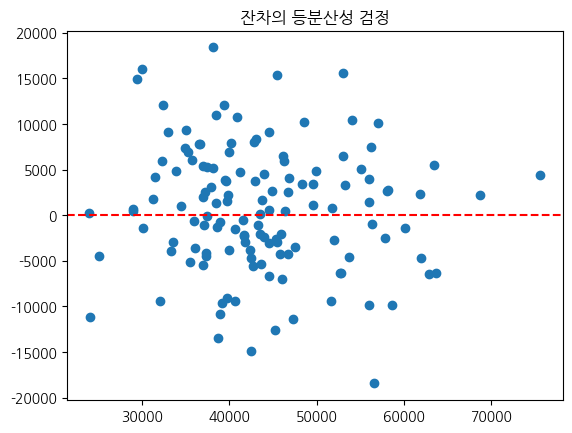

In [352]:
plt.scatter(predicted_value,standard_residual)
plt.axhline(y = 0, c = 'r', ls = '--')
plt.title('잔차의 등분산성 검정')

Text(0.5, 1.0, '잔차의 정규성 검정')

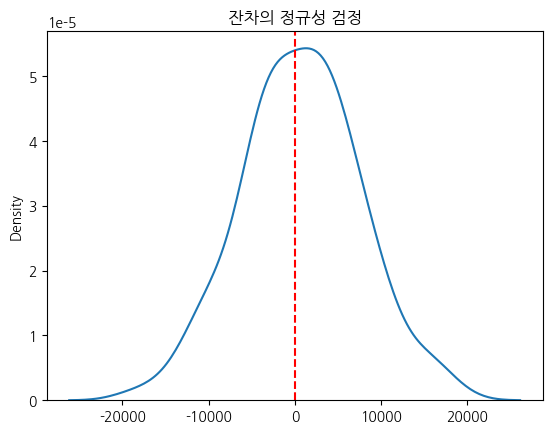

In [354]:
sns.kdeplot(standard_residual)
plt.axvline(x = 0, c = 'r', ls = '--')
plt.title('잔차의 정규성 검정')

In [355]:
theta

array([[-0.91851675],
       [-0.16048959],
       [-0.5013157 ],
       [ 0.53471289],
       [-0.54014324],
       [ 0.03638672]])